In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [87]:
df=pd.read_excel('SU23 BIDA Contest Main File.xlsx')
df.head()

,Date,Customer Account Number,Product,Qty Ordered,Price Each,Cost Each,Payment Type,Is New Customer,Purchase Additional,Total Order Amount,Accepted Promotional Item
0,2022-10-03,CashAccount,Medium Ice Melt,1,22.0,12,Cash,NaN,Yes,57.0,Hat
1,2022-10-03,1310,Small Ice Melt,9,10.0,6,Credit Card,Existing Customer,No,105.0,No
2,2022-10-03,CashAccount,Small Ice Melt,1,11.0,6,Cash,NaN,No,95.0,Energy Drink
3,2022-10-03,CashAccount,Large Ice Melt,3,27.5,15,Cash,NaN,No,95.5,Gloves
4,2022-10-03,CashAccount,Large Ice Melt,2,27.5,15,Cash,NaN,No,156.0,Hand Warmer


In [88]:
# Missing Data in Is New Customer. Need to fill with Unknown category
df['Is New Customer'].fillna('Unknown', inplace=True)

# 3. Calculate the Total Cost for each order
# This metric gives the total expenditure for the business on the products sold in an order.
df['Total Cost'] = df['Qty Ordered'] * df['Cost Each']

# 4. Calculate the Actual Profit
df['Actual Profit'] = df['Total Order Amount'] - df['Total Cost']

# Make a returns dataframe 
returns = df[df['Qty Ordered'] < 0]
returns['Total Order Amount'] = returns['Total Order Amount'].abs()
returns['Qty Ordered'] = returns['Qty Ordered'].abs()

# Make a sales dataframe
sales = df[df['Qty Ordered'] > 0]

C:\Users\Sam McKinven\AppData\Local\Temp\ipykernel_9580\546951886.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sam McKinven\AppData\Local\Temp\ipykernel_9580\546951886.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Missing Data Handling

### Fill Missing 'Is New Customer' Data
The code fills missing values in the 'Is New Customer' column with the category 'Unknown'.
This ensures that each record in the dataset has a value for the 'Is New Customer' attribute.

# Profit and Profit Margin Calculation

### 1. Calculate Total Cost
'Total Cost' is calculated by multiplying the quantity ordered by the cost per unit.
It represents the total cost incurred by the business for the products sold in an order.

### 2. Calculate Actual Profit
'Actual Profit' is calculated by subtracting the 'Total Cost' from the 'Total Order Amount'.
This metric provides insight into the real profitability of each order, considering various factors.

# Creating Separate Dataframes

### Returns Dataframe
A new dataframe 'returns' is created by filtering rows where the 'Qty Ordered' is less than 0.
Negative quantities typically indicate returns.
The 'Total Order Amount' and 'Qty Ordered' columns are transformed to their absolute values.

### Sales Dataframe
A new dataframe 'sales' is created by filtering rows where the 'Qty Ordered' is greater than 0.
Positive quantities represent sales.


In [89]:
df

,Date,Customer Account Number,Product,Qty Ordered,Price Each,Cost Each,Payment Type,Is New Customer,Purchase Additional,Total Order Amount,Accepted Promotional Item,Total Cost,Actual Profit
0,2022-10-03,CashAccount,Medium Ice Melt,1,22.0,12,Cash,Unknown,Yes,57.0,Hat,12,45.0
1,2022-10-03,1310,Small Ice Melt,9,10.0,6,Credit Card,Existing Customer,No,105.0,No,54,51.0
2,2022-10-03,CashAccount,Small Ice Melt,1,11.0,6,Cash,Unknown,No,95.0,Energy Drink,6,89.0
3,2022-10-03,CashAccount,Large Ice Melt,3,27.5,15,Cash,Unknown,No,95.5,Gloves,45,50.5
4,2022-10-03,CashAccount,Large Ice Melt,2,27.5,15,Cash,Unknown,No,156.0,Hand Warmer,30,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-11-01,5310,Medium Ice Melt,15,20.0,12,Credit Card,Existing Customer,No,366.0,Hand Warmer,180,186.0
996,2022-11-01,8418,Medium Ice Melt,13,20.0,12,Credit Card,Existing Customer,No,282.0,No,156,126.0
997,2022-11-01,9023,Large Ice Melt,14,25.0,15,Credit Card,Existing Customer,No,416.0,No,210,206.0
998,2022-11-01,9696,Small Ice Melt,14,10.0,6,Credit Card,Existing Customer,No,227.0,No,84,143.0


In [90]:
# Aggregate total profit by product and quantity
profit_by_product_quantity = sales.groupby(['Product', 'Qty Ordered'])['Actual Profit'].sum().reset_index()

fig = px.scatter(profit_by_product_quantity, x='Qty Ordered', y='Actual Profit', color='Product', 
                 title='Total Profit vs. Quantity for Each Product', hover_name='Product')
fig.show()

# Filter the dataframe for orders greater than 20
large_orders = sales[sales['Qty Ordered'] > 20]

# Sum the 'Actual Profit' for these orders
net_profit_for_large_orders = large_orders['Actual Profit'].sum()
print(f"Net Loss for orders greater than 20 items: ${-net_profit_for_large_orders:.2f}")

Net Loss for orders greater than 20 items: $6594.00


# Total Profit vs. Quantity for Each Product

In the graph titled 'Total Profit vs. Quantity for Each Product', we investigate how profitability trends with the quantity of products ordered. Here's what we discovered:

## Key Insights:
1. **Profitability Trend**: For smaller order quantities (less than 20 items), profit trends are relatively consistent across all product types. This indicates that standard pricing models for small quantities are likely profitable.
  
2. **Large Order Profitability**: However, for orders larger than 20 items, there is a noticeable dip in profitability for some products. This suggests that bulk orders or volume discounts might be eroding the profit margins. If these bulk orders aren't bringing additional advantages (like long-term customer retention or significant reductions in per-unit costs), then these discounting strategies may need re-evaluation.

3. **Potential Actions**:
   - **Review Discount Strategies**: Consider reviewing and potentially revising discount structures for bulk orders. While volume discounts can incentivize larger purchases, it's essential to ensure they don't negatively impact overall profitability.
   - **Segmented Pricing**: One strategy could be to offer tiered pricing. This can cater to both small buyers and bulk purchasers, ensuring profitability across all segments.
   - **Customer Negotiation**: If specific customers consistently place large orders and receive significant discounts, consider renegotiating terms. Offering value in other ways might allow for less aggressive price discounts.

In summary, while volume discounts can be a valuable tool to incentivize large purchases, it's vital to ensure they are balanced and don't compromise the overall profit goals of the business.


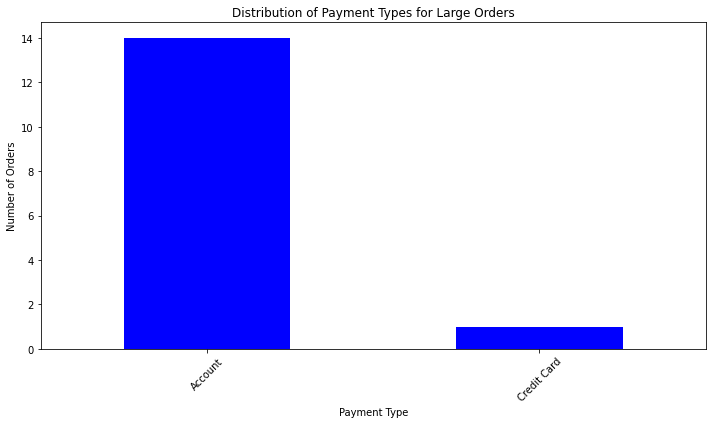

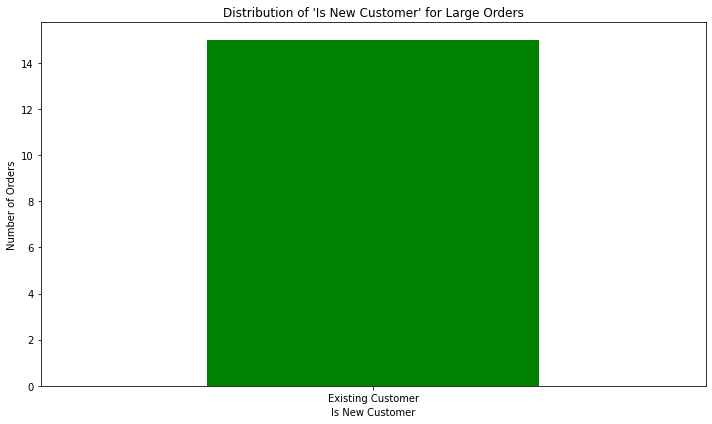

In [91]:
large_orders_df = sales[sales['Qty Ordered'] > 20]

# Payment Type
payment_types_counts = large_orders_df['Payment Type'].value_counts()

plt.figure(figsize=(10, 6))
payment_types_counts.plot(kind='bar', color='blue')
plt.title("Distribution of Payment Types for Large Orders")
plt.xlabel("Payment Type")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Is New Customer
new_customer_counts = large_orders_df['Is New Customer'].value_counts()

plt.figure(figsize=(10, 6))
new_customer_counts.plot(kind='bar', color='green')
plt.title("Distribution of 'Is New Customer' for Large Orders")
plt.xlabel("Is New Customer")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Analysis of Large Orders

The code focuses on analyzing the 'large orders' from the sales data. Here, 'large orders' refer to those orders where the quantity ordered exceeds 20.

## Conclusion

The analysis reveals that most large orders (quantities above 20) come from existing customers who predominantly use the 'account' mode of payment. Unfortunately, these large orders are causing the business to incur losses, primarily because of the discounts applied based on quantity ordered and the associated payment method. It's evident that the current pricing strategy, especially for bulk orders and the 'account' payment mode, is not optimized for profitability. A revision of the pricing and discount strategy is imperative to ensure that these large orders contribute positively to the business's bottom line.

## Solution

My recommended solution is to implement a tiered discount pricing strategy that has a cap. At a certian point of discounts the cost to create N many products will outweigh the revenue of the sale. A limit will help mitigate this issue. 


In [92]:
# Remove the orders that are not receiving too large of discounts.
df = df[df['Qty Ordered'] <= 20]
sales= sales[sales['Qty Ordered'] <= 20]

In [93]:
fig = px.scatter(df, x='Qty Ordered', y='Price Each', color='Product', title='Volume Discounts Across All Products', 
                 hover_name='Product', hover_data=['Total Order Amount'])
fig.show()

# Volume Discounts Analysis Across Products

The data suggests that as the volume (quantity ordered) increases, the unit price for each product decreases. This indicates the application of volume discounts.

## Observations

From the visualization, it's evident that there are additional discounts applied to purchases, beyond just the volume order discounts. One potential explanation for this could be the form of payment used by customers. 


In [94]:
# Group data by Product, Payment Type, and Qty Ordered and then compute the average Price Each
agg_data = df.groupby(['Product', 'Payment Type', 'Qty Ordered'])['Price Each'].mean().reset_index()
agg_data.rename(columns={'Price Each': 'Average_Price_Each'}, inplace=True)

fig = px.scatter(agg_data, x='Qty Ordered', y='Average_Price_Each', color='Product', 
                 facet_col='Payment Type', 
                 title='Average Price by Qty Ordered for Different Payment Types and Products',
                 labels={'Average_Price_Each': 'Average Price Each'})
fig.show()


## Analyzing Price Discounts by Payment Type and Quantity Ordered

In this analysis, we investigated how the payment type used by customers affects the average price they pay for different products, depending on the quantity ordered. The goal was to determine if certain payment types lead to price discounts on average.

### Insights

The scatter plot with facet columns provides a clear visualization of how different payment types impact the average price customers pay for various products based on the quantity ordered. By examining the plot, it's evident that, on average, the price each is discounted when customers use an "Account" as the payment type for all products. The other payment types do not exhibit this consistent trend.


In [95]:
grouped_df = df.groupby(['Payment Type', 'Accepted Promotional Item']).agg(Count=('Qty Ordered', 'size'), Total_Order_Qty=('Qty Ordered', 'sum'),Total_Actual_Profit=('Actual Profit', 'sum')).reset_index()

# Calculate Profit per Order
grouped_df['Profit_per_Order'] = grouped_df['Total_Actual_Profit'] / grouped_df['Count']

fig = px.imshow(grouped_df.pivot(index='Accepted Promotional Item', columns='Payment Type', values='Profit_per_Order'),
                title='Actual Profit per Order by Payment Type and Accepted Promotional Item',
                labels=dict(x="Payment Type", y="Accepted Promotional Item", color="Profit per Order"),
                color_continuous_scale="Blues")

# Improving the colorbar title for clarity
fig.update_layout(coloraxis_colorbar_title='Profit per Order')

fig.show()


# Analysis of Profitability and Promotional Strategies

### Highest Profitability Combinations

- Customers who pay with a "Credit Card" and accept the "Hand Warmer" promotional item generate the highest average profit per order.
- Using "Debit" for payment and accepting the "Hat" promotional item results in the second-highest profit per order.

### Least Profitable Combinations

- The combination of paying in "Cash" and not accepting any promotional item is the least profitable. This could suggest that promotional items influence the purchase value or that cash-paying customers have specific spending patterns.

### Promotional Item Effect

- Across most payment types, accepting a promotional item tends to result in a higher average profit per order. This observation could indicate that promotional items positively influence purchasing behavior, perhaps incentivizing more substantial purchases or upsells.

### Payment Type Observations

- Payments made using "Credit Card" and "Debit" generally lead to higher average profits compared to those made with "Cash", especially when paired with a promotional item. This pattern might suggest that the convenience or perception of electronic payment methods encourages larger transactions.

- Transactions paid in "Cash" seem to yield lower profits on average, which might reflect the behavior of cash-paying customers being more budget-conscious.

### Consistency in Promotional Acceptance

- Across most payment types, the "Hat" and "Hand Warmer" promotional items consistently lead to higher profits per order. These items might resonate well with customers, encouraging more purchases.


### Effect of Payment Types

- When examining different payment methods, customers using "Credit Card" or "Debit" tend to yield a higher profit per order. This trend might suggests that these customers are more open to making larger purchases or that electronic payment methods indirectly promote more substantial transactions.



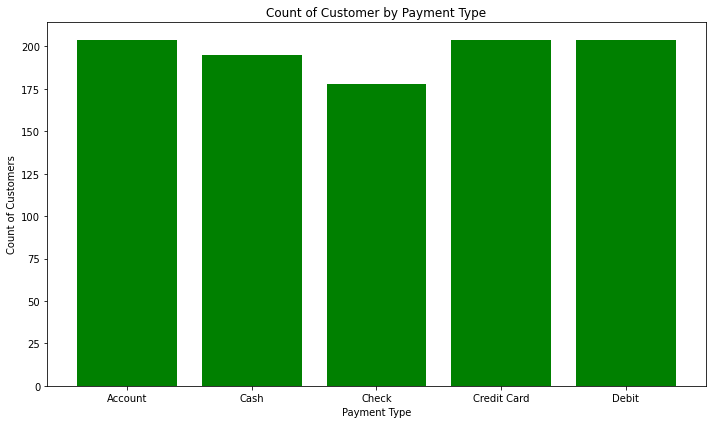

In [96]:
# Group by 'Payment Type' and sum the 'Qty Ordered'
grouped = df.groupby('Payment Type')['Qty Ordered'].count().reset_index()

# Plotting
plt.figure(figsize=(10,6))
plt.bar(grouped['Payment Type'], grouped['Qty Ordered'], color=['green'])
plt.xlabel('Payment Type')
plt.ylabel('Count of Customers')
plt.title('Count of Customer by Payment Type')
plt.tight_layout()
plt.show()

## End All-Conclusion

**My recommendation** is the following:

1. **Re-evaluate the bulk discounts:** Set a cap on the discount offered per item ordered. Beyond a certain level of discounting, the transaction becomes unprofitable.

2. **Re-assess the discounts for the "Account" payment type:** This payment type isn't driving the same level of profitability as credit and debit cards. The strategy of incentivizing customers to use the "Account" payment method might be flawed. 

3. **Rethink the promotional strategy:** The current approach for the account payment type isn't yielding desirable profit margins. I suggest two potential strategies:
   - **Loyalty Programs:** Instead of discounting based on the payment method, introduce a loyalty program based on the frequency of purchases. This can encourage repeat business without sacrificing profitability on each transaction.
   - **Membership Fees:** Consider introducing a membership fee for the account category to boost the revenue stream.

By implementing these strategies, we aim to increase profitability without sacrificing customer loyalty.
